In [1]:
from IPython.display import IFrame

In [6]:
IFrame("hw1.pdf", width=1000, height=1000)

# Responses

## Problem 1

__[d]__
1. Not learning--recall that one of the key components of a problem that requires Learning is that the target function is __unknown__. In this case, we have exact specifications we can use to classify coins. 
2. Supervised Learning--we have labeled coins and want to infer decision boundaries so that we can infer a target function that tells us which coins belong to which category. This is not Unsupervised because __we are given labels__.
3. Reinforcement Learning--this uses a penalty/reward system to iteratively improve Tic-Tac-Toe playing. 

## Problem 2

__[a]__--(ii) and (iv) are good choices for ML. In (ii), we don't know exactly how to weight/value certain things from a credit card transaction to decide whether it is fraudulent, but we can learn it (given data). Similarly, determining the optimal cycle for traffic lights depends on a number of variables, and it's non-trivial to decide how to weight/use them. 

## Problem 3

__[c]__
For the first bag, $ \mathbb{P}[pick \ black \ | \ picked \ black]_1 = 1 $ since there are 2 black balls. For the second, since there is one black and one white ball, $ \mathbb{P}[pick \ black \ | \ picked \ black]_2 = 0 $. The probability of picking either bag is $ \dfrac{1}{2} $, so the total probability that the second ball we pick is black after randomly selecting one of the two bags is $$ \dfrac{1}{2} \cdot \mathbb{P}[pick \ black \ | \ picked \ black]_1 + \dfrac{1}{2} \cdot \mathbb{P}[pick \ black \ | \ picked \ black]_2 = \dfrac{1}{2} $$

## Problem 4

__[b]__
If we draw ten marbles, then the probality we get no reds is $$ \mathbb{P}[\nu = 0] = \mathbb{P}[drew \ ten \ greens] = 0.45^{10} = 3.405 \times 10^{-4}. $$

## Problem 5

In [8]:
import numpy as np

In [12]:
s = np.random.uniform(0,1,2)

In [13]:
s

array([ 0.36057611,  0.57849578])

In [14]:
for sample in s:
    print(sample)

0.360576106197
0.5784957793


In [15]:
prob_red = 0.55
def draw_sample(prob, num_samples):
    s = np.random.uniform(0,1,num_samples)
    return s

We want the probability that at least one sample of 10 marbles out of 1000 has $ \nu = 0 $. That's one minus the probability that no sample has $\nu = 0$, or the probability that all samples have at least one red marble.

The probability that an individual sample has at least one red marble comes from the last problem--it is 1 minus the answer we got there, or $$ 0.99965949371. $$

So this means that we draw 1000 red marbles. So $$ \mathbb{P}[\text{at least one } \nu = 0] = 1 - \mathbb{P}[\text{no} \nu = 0] $$ $$ = 1 - 0.99965949371^{1000} \approx 0.289 . $$

The answer is __[c]__

## Problem 6

There are 8 possible target functions that agree with $\textit{D}$. If we actually inspect the 5 training examples, we notice that an XOR of the three values would agree with everything there.

## Problems 7-10

In [21]:
def pick_two_random_points():
    # returns two random values, each in [-1,1]
    pt1 = np.random.uniform(-1,1,2)
    pt2 = np.random.uniform(-1,1,2)
    return pt1,pt2

In [20]:
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
def draw_line_from_random_pts():
    pt1, pt2 = pick_two_random_points()
    # compute coefficients
    coefficients = np.polyfit([pt1[0], pt1[1]], [pt2[0], pt2[1]], 1) 

    # create a polynomial object with the coefficients
    polynomial = np.poly1d(coefficients)

    # for the line to extend beyond the two points, 
    # create the linespace using the min and max of the x_lim
    # I'm using -1 and 1 here
    x_axis = np.linspace(-1, 1)

    # compute the y for each x using the polynomial
    y_axis = polynomial(x_axis)
    
    fig = plt.figure()
    axes = plt.axes()
    axes.plot(x_axis, y_axis)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    axes.plot(pt1[0], pt2[0], pt1[1], pt2[1], marker='o', color='red')

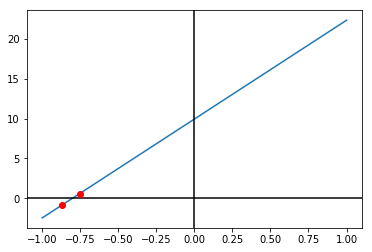

In [37]:
draw_line_from_random_pts()

In [32]:
pt1, pt2 = pick_two_random_points()

In [33]:
# compute coefficients
coefficients = np.polyfit([pt1[0], pt1[1]], [pt2[0], pt2[1]], 1)

# create a polynomial object with the coefficients
polynomial = np.poly1d(coefficients)

In [34]:
polynomial # coeff

poly1d([ 1.03485446, -0.40126896])

In [35]:
coefficients

array([ 1.03485446, -0.40126896])

So the first element of coefficients is the weight, while the second is the bias.

In [46]:
dataset = np.random.uniform(-1,1,10) # create dataset of size 10.

In [49]:
def create_target_function():
    """
    create target function by initializing a line passing thru two random points in R2.
    """
    pt1, pt2 = pick_two_random_points()
    
    # compute coefficients
    coefficients = np.polyfit([pt1[0], pt1[1]], [pt2[0], pt2[1]], 1)
    
    weight = coefficients[0]
    bias = coefficients[1]
    
    return weight, bias

In [86]:
def create_dataset(size):
    dataset = []
    for i in range(size):
        x = np.random.uniform(-1,1,2) # generate (x,y)
        dataset.append(x)
        
    return dataset

In [81]:
def eval_target_function(dataset, target_function):
    """
    dataset will be an array of points in R2
    target_function is a pair of values (weight, bias)
    
    use the target function with the dataset, return an array of values representing y values for each data point.
    Say that we give 1 prediction if x is "above" the line. That is, (x1,x2) is above the line y = mx+b if
    y1 = mx1 + b < x2
    """
    (weight, bias) = target_function
    # weight, bias = create_target_function() # line is weight*x + bias
    y = np.zeros(len(dataset)) # size 10
    
    for index in range(len(dataset)):
        x = dataset[index]
        x1, x2 = x[0], x[1]
        if weight*x1 + bias <= x2:
            prediction = 1
        else:
            prediction = -1
        y[index] = prediction
        
    return y

In [62]:
dataset = create_dataset(size=10)

In [63]:
dataset

[array([ 0.96931462, -0.82981663]),
 array([ 0.36924486,  0.45931993]),
 array([-0.57090423, -0.96858732]),
 array([-0.63475047,  0.33644747]),
 array([ 0.10710692, -0.52540432]),
 array([-0.85902423, -0.07505821]),
 array([-0.64696782,  0.3620291 ]),
 array([-0.50893985, -0.61079892]),
 array([-0.25689862,  0.00222871])]

In [64]:
y = eval_target_function(dataset)

In [65]:
y

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [45]:
def perceptron_random_pts(value):
    # used to evaluate training examples.
    x = value[0]
    y = value[1]
    weight, bias = create_target_function()
    
    if weight*x + bias >= 0: 
        prediction = 1
    else:
        prediction = -1
    
    
    # check that prediction matches value of y in the training sample
    if prediction == y:
        return True
    else:
        return False

In [241]:
def misclassified(value, target_function, hypothesis):
    """
    tells us if hypothesis output for a training example is correct or not, based on target function.
    """
    x = value[0]
    y = value[1]
    
    true_val = eval_target_function([value], target_function)[0]
    # print('true val: '+ str(true_val))
    
    return not (hypothesis == true_val) # true if the value is indeed misclassified.

In [69]:
import random

In [72]:
np.multiply(3, [2,2])

array([6, 6])

In [74]:
np.sign(-6)

-1

In [242]:
def get_all_misclassified(dataset, target_function, weight_vector):
    misclassified_idx = []
    for index in range(len(dataset)):
        # print("value: " + str(dataset[index]))
        hypothesis = np.sign(np.inner(weight_vector, dataset[index]))
        #print("hypothesis: " + str(hypothesis))
        if misclassified(dataset[index], target_function, hypothesis):
            misclassified_idx.append(index)
            
    return misclassified_idx

In [288]:
def PLA(dataset, target_function, debug=False):
    """
    the Perceptron Learning Algorithm, for full dataset
    """
    y_vals = eval_target_function(dataset, target_function) # get the array of y values for each point in dataset.
    w = np.zeros(2) # init weight vector to 2 zeros: inner product of w,x is 0 --> sign(wTx) = 0
    num_iters = 0 # keep track of num iterations
    
    indices = [i for i in range(len(dataset))]
    misclassified_indices = indices # everything is misclassified at first
    
    while misclassified_indices:
        # keep running until nothing is misclassified
        num_iters += 1
        
        # randomly pick a value from the misclassified indices to evaluate.
        chosen_idx = random.choice(misclassified_indices)
        chosen_value = dataset[chosen_idx]
        
        # update weight vector: w <-- w + y_n * x_n
        w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
        
        # update misclassified indices
        misclassified_indices = get_all_misclassified(dataset, target_function, w)
        
        if debug:
            print("misclassified indices now: " + str(misclassified_indices))
        
    # now that nothing is misclassified, we get our hypothesis as a vector
    g = []
    for x in dataset:
        prediction = np.sign(np.inner(w,x))
        g.append(prediction)
        
    if debug:
        print("g is: " + str(g))
        
    # calcualte P[g != f] where f was the target function.
    size = len(g)
    num_wrong = 0
    f = y_vals
    for i in range(size):
        if debug:
            print("i is: " + str(i))
        if g[i] != f[i]:
            num_wrong += 1
            
    prob_different = num_wrong / size # this is the probability P[g != f] where g is the hypothesis values.
    
    return num_wrong, num_iters

In [216]:
dataset = create_dataset(size=3)

In [217]:
dataset

[array([ 0.5569381 , -0.47479243]),
 array([-0.19605403, -0.38043545]),
 array([-0.79218672, -0.28998409])]

In [218]:
target_function = create_target_function()

In [219]:
f = eval_target_function(dataset, target_function)

In [220]:
f # true values.

array([-1., -1., -1.])

In [182]:
num_wrong, num_iters = PLA(dataset, target_function)

In [183]:
num_wrong, num_iters

(1, 3)

In [221]:
w = np.zeros(2)
num_iters = 0 # keep track of num iterations
    
indices = [i for i in range(len(dataset))]
misclassified_indices = indices # everything is misclassified

In [222]:
indices

[0, 1, 2]

In [223]:
get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: 0.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: 0.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: 0.0
true val: -1.0


[0, 1, 2]

In [224]:
y_vals = eval_target_function(dataset, target_function)

In [225]:
y_vals

array([-1., -1., -1.])

In [226]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx])

print("w: " + str(w))

chosen idx: 0
w: [-0.5569381   0.47479243]


In [227]:
get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: -1.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: -1.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: 1.0
true val: -1.0


[2]

In [232]:
w = [-0.5569381, 0.47479243]

In [233]:
misclassified_indices = get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: -1.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: -1.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: 1.0
true val: -1.0


In [234]:
misclassified_indices

[2]

In [235]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx])

print("w: " + str(w))

chosen idx: 2
w: [ 0.23524862  0.76477652]


In [236]:
get_all_misclassified(dataset, target_function, w)

value: [ 0.5569381  -0.47479243]
hypothesis: -1.0
true val: -1.0
value: [-0.19605403 -0.38043545]
hypothesis: -1.0
true val: -1.0
value: [-0.79218672 -0.28998409]
hypothesis: -1.0
true val: -1.0


[]

In [294]:
def run_experiments(dataset, num_experiments):
    """
    runs a number of experiments, returns average num iterations and correctness.
    """
    total_num_wrong = 0
    total_num_iters = 0
    
    for i in range(num_experiments):
        target_function = create_target_function() # create a new target function every iter
        
        num_wrong, num_iters = PLA(dataset, target_function)
        print("num wrong: " + str(num_wrong))
        print("num iters: " + str(num_iters))
        
        total_num_wrong += num_wrong
        total_num_iters += num_iters
        
    avg_wrong = total_num_wrong / num_experiments
    avg_iters = total_num_iters / num_experiments
    
    return avg_wrong, avg_iters

## Problem 7

Now that we've written the code, let's try a number of tests with 10 training points.

In [295]:
dataset = create_dataset(size=10)
target_function = create_target_function()

In [296]:
dataset, target_function

([array([ 0.50447079,  0.44472886]),
  array([-0.34692215,  0.34655712]),
  array([-0.64452244, -0.77717203]),
  array([ 0.91292556, -0.14183649]),
  array([-0.76035426,  0.79586278]),
  array([-0.43567624, -0.72772066]),
  array([ 0.95099553, -0.20865969]),
  array([ 0.90991103, -0.80259751]),
  array([ 0.1466349 ,  0.53204653]),
  array([ 0.74161213, -0.19608327])],
 (-1.0734419554609853, -0.73607613101628888))

In [307]:
x_vals = [x[0] for x in dataset]
y_vals = [x[1] for x in dataset]

polynomial = np.poly1d(target_function)

x_axis = np.linspace(-1, 1)
y_axis = polynomial(x_axis)

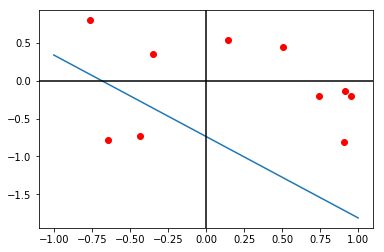

In [308]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_axis, y_axis)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [303]:
y_vals = eval_target_function(dataset, target_function)

In [304]:
y_vals

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.])

This makes sense. We have two points that are "under" the line.

In [309]:
w = np.zeros(2) # init weight vector to 2 zeros: inner product of w,x is 0 --> sign(wTx) = 0
indices = [i for i in range(len(dataset))]
misclassified_indices = indices # everything is misclassified at first

In [310]:
misclassified_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Let's do one iteration.

In [311]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 7
new weight vector: [-0.73029233  0.64416277]
misclassifieds now: [0, 3, 6, 7, 9]


Let's see what graph looks like after one iter.

In [312]:
polynomial = np.poly1d(w)

x_axis = np.linspace(-1, 1)
y_axis = polynomial(x_axis)

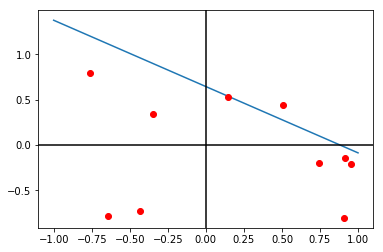

In [313]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x_axis, y_axis)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.plot(x_vals, y_vals, 'ro')
plt.show()

In [314]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 6
new weight vector: [-0.92872676  0.68770163]
misclassifieds now: [0, 2, 3, 6, 7, 9]


In [315]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 6
new weight vector: [-1.12716119  0.7312405 ]
misclassifieds now: [0, 2, 3, 6, 7, 9]


In [316]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 3
new weight vector: [-1.25664735  0.75135809]
misclassifieds now: [0, 2, 3, 5, 6, 7, 9]


In [317]:
chosen_idx = random.choice(misclassified_indices)
print("chosen idx: " + str(chosen_idx))
chosen_value = dataset[chosen_idx]

# update weight vector: w <-- w + y_n * x_n
w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
print("new weight vector: " + str(w))

# update misclassified indices
misclassified_indices = get_all_misclassified(dataset, target_function, w)
print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 5
new weight vector: [-0.93959675  1.28093545]
misclassifieds now: [3, 6, 7, 9]


In [318]:
for i in range(7):
    chosen_idx = random.choice(misclassified_indices)
    print("chosen idx: " + str(chosen_idx))
    chosen_value = dataset[chosen_idx]

    # update weight vector: w <-- w + y_n * x_n
    w = w + np.multiply(y_vals[chosen_idx], dataset[chosen_idx]) # the second element is (1,2) since mult el't-wise.
    print("new weight vector: " + str(w))

    # update misclassified indices
    misclassified_indices = get_all_misclassified(dataset, target_function, w)
    print("misclassifieds now: " + str(misclassified_indices))

chosen idx: 7
new weight vector: [-1.66988908  1.92509821]
misclassifieds now: [3, 6, 7, 9]
chosen idx: 7
new weight vector: [-2.4001814   2.56926098]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 3
new weight vector: [-2.52966756  2.58937857]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 3
new weight vector: [-2.65915371  2.60949616]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 7
new weight vector: [-3.38944604  3.25365892]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 6
new weight vector: [-3.58788047  3.29719779]
misclassifieds now: [0, 3, 6, 7, 9]
chosen idx: 0
new weight vector: [-3.36352775  3.49498155]
misclassifieds now: [0, 3, 6, 7, 9]


In [292]:
PLA(dataset, target_function)

(0, 1)

In [293]:
run_experiments(10, 20) # 20 times

dataset: [array([-0.91887986,  0.12242646]), array([ 0.29485131,  0.36714039]), array([-0.75202978,  0.55250081]), array([-0.08770358,  0.37521122]), array([ 0.42128342, -0.28876555]), array([-0.8781402 , -0.97776301]), array([-0.96335881, -0.35727012]), array([ 0.90668915, -0.9141707 ]), array([-0.0141492 ,  0.58359236]), array([ 0.7289281 , -0.80355146])]
target function: (0.54930840235756095, 0.30138891179843041)


KeyboardInterrupt: 